<a href="https://colab.research.google.com/github/nehalmuthu/Covid-Simulation-in-Federated-Environment/blob/master/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import savemat

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

def sterr(nam,X_test,y_test,weights):
  st1=X_test[X_test.sub_region_1==nam]
  st1=st1.drop(['sub_region_1'], axis = 1)
  infectionNo=np.dot(st1,np.transpose(weights))
  for i in range(len(infectionNo)):
    if infectionNo[i]<=0:
      infectionNo[i]=1
    
  yact=list(y_test[st1.index])
  for i in range(len(yact)):
    if yact[i]<=0:
      yact[i]=1
  #plt.plot(infectionNo)
  #plt.plot(yact)
  #plt.title(nam)
  
  mse_lr = mean_squared_error(yact, infectionNo)
  mae_lr = mean_absolute_error(yact, infectionNo)
  mape_lr = mean_absolute_percentage_error(yact, infectionNo)


  #print('Mean squared error from fed learning: ', mse_lr)
  #print('Mean absolute error from fed learning: ', mae_lr)
  return [mse_lr, mae_lr,mape_lr]


In [87]:

#us-fewstates
#weights=np.array([-60.2787,   29.7225,  -2.4390,    0.7915,   -3.0091,   67.4911])

#us-fewstates date adjusted
#weights=np.array([ -58.5539,   31.8991,   -2.4852,    0.2373,    2.4239,   90.2976])


#us-few-states-recent
weights=np.array([ -62.2272,   54.5818,   -3.8243,    7.9004,  -10.9070,   75.3661])
 

In [176]:
X_test=pd.read_csv('/content/x_test.csv')
y_test=pd.read_csv('/content/y_test.csv')


In [177]:
y_test=y_test['cases']

In [90]:
stlist=X_test.sub_region_1.unique()
ms=[]
ma=[]
mpe=[]
for i in X_test.sub_region_1.unique():
  nam=i
  mse,mae,mape=sterr(nam,X_test,y_test,weights)
  ms.append(mse)
  ma.append(mae)
  mpe.append(mape)

In [91]:
df = pd.DataFrame(list(zip(stlist,np.round(mpe,2),np.round(ma,2),np.round(ms,2))),
               columns =['state','MAPE','MAD','MSE'])

In [92]:
df

,state,MAPE,MAD,MSE
0,Colorado,2.42,974.64,1570830.27
1,Kentucky,22.73,1164.85,2525733.58
2,Washington,5.56,1118.27,2141373.94
3,Alabama,11.95,930.56,1545061.13
4,Minnesota,1.51,837.23,1200815.28


In [168]:
weights=[
 -24.5816,
   21.7912,
   -4.1286,
   -4.4444,
  -37.4159,
  -60.5527
]

In [213]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error


def testplt(nam,X_test,y_test,weights):
  st1=X_test[X_test.sub_region_1==nam]
  st1=st1.drop(['sub_region_1'], axis = 1)
  infectionNo=np.dot(st1,np.transpose(weights))
  for i in range(len(infectionNo)):
    if infectionNo[i]<=0:
      infectionNo[i]=1
    
  yact=list(y_test[st1.index])
  for i in range(len(yact)):
    if yact[i]<=0:
      yact[i]=1
  for i in range(1,len(yact)):
    yact[i]=yact[i]+yact[i-1]
    infectionNo[i]=infectionNo[i]+infectionNo[i-1]
  

  plt.plot(yact,label='actual')
  plt.plot(infectionNo,label='predicted')

  plt.xlabel('Days')
  # naming the y axis
  plt.ylabel('Cumulative Case')
  plt.title(nam)

  plt.legend()
  plt.show()
    

In [214]:
stlist

array(['Colorado', 'Kentucky', 'Washington', 'Alabama', 'Minnesota'],
      dtype=object)

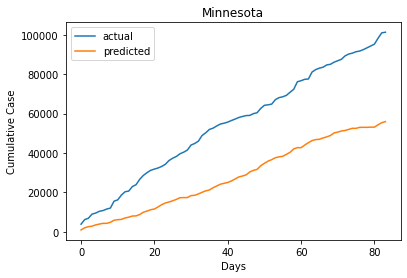

In [222]:
stlist=X_test.sub_region_1.unique()
nam='Minnesota'
testplt(nam,X_test,y_test,weights)